In [24]:
import pandas
print (pandas.__version__)

2.2.2


In [26]:
pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.2.2
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-ty

In [27]:
import pandas as pd 
data = "AnemiaTipos.csv"

dataset = pd.read_csv(data)

dataset

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1146,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1147,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1148,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


In [28]:
# Librerías para el desarrollo del proyecto
import matplotlib.pyplot as plt  # Librería para gráficas
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.ticker import StrMethodFormatter
import seaborn as sb

# Librerías pandas para el manejo de los datos
import pandas as pd
import pandas as pq
import pandas as pf
import pandas as filtro_filas

# Enlazando los datos en el archivo CSV
data = pd.read_csv("AnemiaTipos.csv", index_col=None)
import numpy as np
# Invocando a la librería
from lightgbm import LGBMClassifier  # salu2

In [29]:
#Verificamos cuantos tipos de enfermedades hay :V
print(data.groupby('Diagnosis').size())

Diagnosis
Healthy                           336
Iron deficiency anemia            189
Macrocytic anemia                  18
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Other microcytic anemia            59
dtype: int64


In [30]:
X = data[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']]

In [31]:
X.shape

(1150, 14)

In [32]:
Y = data['Diagnosis']
#ya = data_datos["CALIFICACION"] 
Y.shape

(1150,)

## CODIFICANDO "Y"

In [34]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_codificado = le.fit_transform(Y)

# Mostrar la codificación de cada clase
print("Codificación de clases:")
for i, clase in enumerate(le.classes_):
    print(f"{clase} -> {i}")

Codificación de clases:
Healthy -> 0
Iron deficiency anemia -> 1
Macrocytic anemia -> 2
Normocytic hypochromic anemia -> 3
Normocytic normochromic anemia -> 4
Other microcytic anemia -> 5


In [35]:
print(le.classes_)
##EN ESE ORDEN ESTAN PARA EL SISTEMA, DE AHI SACA 0 1 2 3 4 5 -->

['Healthy' 'Iron deficiency anemia' 'Macrocytic anemia'
 'Normocytic hypochromic anemia' 'Normocytic normochromic anemia'
 'Other microcytic anemia']


In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## PARTICIONAMIENTO DE LA DATA

In [38]:
from sklearn.model_selection import train_test_split

# Aquí usas X sin cambios y la Y codificada
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y_codificado, test_size=0.2, random_state=0)
print("---")
print(f"Entrenamiento: {X_trainset.shape[0]} muestras, {X_trainset.shape[1]} variables")
print(f"Etiquetas entrenamiento: {y_trainset.shape[0]} valores")
print(f"Prueba: {X_testset.shape[0]} muestras, {X_testset.shape[1]} variables")
print(f"Etiquetas prueba: {y_testset.shape[0]} valores")

---
Entrenamiento: 920 muestras, 14 variables
Etiquetas entrenamiento: 920 valores
Prueba: 230 muestras, 14 variables
Etiquetas prueba: 230 valores


## BALANCEANDO

In [51]:
from imblearn.combine import SMOTETomek
from collections  import Counter

print("Distribución antes del resampling:", Counter(y_trainset))

os_us = SMOTETomek(sampling_strategy='auto', random_state=0)
X_train_res, y_train_res = os_us.fit_resample(X_trainset, y_trainset)

print("Distribución tras aplicar SMOTE-Tomek", Counter(y_train_res))

Distribución antes del resampling: Counter({0: 272, 3: 225, 4: 208, 1: 151, 5: 49, 2: 15})
Distribución tras aplicar SMOTE-Tomek Counter({5: 271, 2: 271, 1: 266, 4: 262, 0: 260, 3: 256})


## MODELO STACKING

In [54]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import classification_report
import numpy as np

# Convertir a numpy arrays
X_train_np = X_train_res.values if hasattr(X_train_res, 'values') else np.array(X_train_res)
X_test_np = X_testset.values if hasattr(X_testset, 'values') else np.array(X_testset)

# Modelos base
model_tnet = TabNetClassifier(n_d=24, n_a=24, n_steps=7, gamma=1.3, lambda_sparse=0.00001, optimizer_params=dict(lr=0.002), scheduler_params={"step_size": 10, "gamma": 0.9}, mask_type='sparsemax', momentum=0.3, verbose=0)
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features=None, min_samples_leaf=10, splitter='best', random_state=42)
model_lgbm = LGBMClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=31, random_state=42)
model_rf = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2', max_leaf_nodes=None, n_estimators=100, random_state=42)
model_cb = CatBoostClassifier(depth=7, iterations=200, l2_leaf_reg=3, learning_rate=0.1, verbose=0, random_state=42)

meta_model = XGBClassifier(gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Stacking
stacking_model = StackingClassifier(
    estimators=[
        ('lgm', model_lgbm),
        ('rf', model_rf),
        ('tnet', model_tnet),
        ('dt', model_dt),
        ('cb', model_cb),

    ],
    final_estimator=meta_model,
    cv=10,
    passthrough=False,
    n_jobs=-1
)

# Entrenamiento
stacking_model.fit(X_train_np, y_train_res)

# Evaluación
y_pred = stacking_model.predict(X_test_np)
print(classification_report(y_testset, y_pred, digits=7)) 

D:\Archivos de programa\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:02:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0  1.0000000 0.9687500 0.9841270        64
           1  1.0000000 1.0000000 1.0000000        38
           2  1.0000000 1.0000000 1.0000000         3
           3  0.9818182 1.0000000 0.9908257        54
           4  1.0000000 1.0000000 1.0000000        61
           5  0.8181818 0.9000000 0.8571429        10

    accuracy                      0.9869565       230
   macro avg  0.9666667 0.9781250 0.9720159       230
weighted avg  0.9878261 0.9869565 0.9872180       230



In [56]:
y_decodificado = le.inverse_transform(y_codificado)

print(y_codificado)
print(y_decodificado)

[3 3 1 ... 0 0 0]
['Normocytic hypochromic anemia' 'Normocytic hypochromic anemia'
 'Iron deficiency anemia' ... 'Healthy' 'Healthy' 'Healthy']


## MÉTRICAS DEL MODELO (TRAIN)

In [59]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# ==== EVALUACIÓN EN ENTRENAMIENTO ====
y_pred_train = stacking_model.predict(X_train_np)
y_probs_train = stacking_model.predict_proba(X_train_np)

print('\n--- MÉTRICAS EN EL CONJUNTO DE ENTRENAMIENTO ---')
print(f'Accuracy: {accuracy_score(y_train_res, y_pred_train):.8f} → {accuracy_score(y_train_res, y_pred_train)*100:.8f} %')
print(f'Precisión: {precision_score(y_train_res, y_pred_train, average="macro"):.8f} → {precision_score(y_train_res, y_pred_train, average="macro")*100:.8f} %')
print(f'Recall (sensibilidad): {recall_score(y_train_res, y_pred_train, average="macro"):.8f} → {recall_score(y_train_res, y_pred_train, average="macro")*100:.8f} %')
print(f'F1-score: {f1_score(y_train_res, y_pred_train, average="macro"):.8f} → {f1_score(y_train_res, y_pred_train, average="macro")*100:.8f} %')

# Cálculo ROC AUC
if len(np.unique(y_train_res)) == 2:
    roc_auc_train = roc_auc_score(y_train_res, y_probs_train[:, 1])
else:
    roc_auc_train = roc_auc_score(LabelBinarizer().fit_transform(y_train_res), y_probs_train, multi_class='ovr')
print(f'ROC AUC: {roc_auc_train:.8f} → {roc_auc_train*100:.8f} %')
print(f'Matthews Correlation Coefficient: {matthews_corrcoef(y_train_res, y_pred_train):.8f} → {matthews_corrcoef(y_train_res, y_pred_train)*100:.8f} %')


--- MÉTRICAS EN EL CONJUNTO DE ENTRENAMIENTO ---
Accuracy: 1.00000000 → 100.00000000 %
Precisión: 1.00000000 → 100.00000000 %
Recall (sensibilidad): 1.00000000 → 100.00000000 %
F1-score: 1.00000000 → 100.00000000 %
ROC AUC: 1.00000000 → 100.00000000 %
Matthews Correlation Coefficient: 1.00000000 → 100.00000000 %


D:\Archivos de programa\Anaconda\Lib\site-packages\torch\utils\data\_utils\collate.py:285: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:209.)
  return collate([torch.as_tensor(b) for b in batch], collate_fn_map=collate_fn_map)


In [60]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

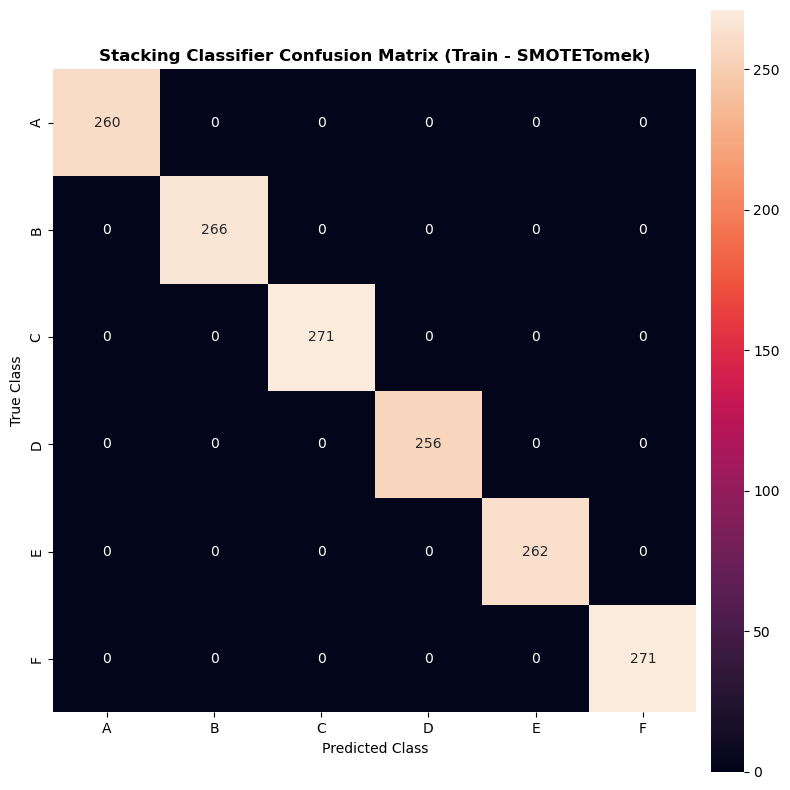


📌 Referencia de clases:
A - Healthy
B - Iron deficiency anemia
C - Macrocytic anemia
D - Normocytic hypochromic anemia
E - Normocytic monochromatic anemia
F - Other microcytic anemia

📊 Classification Report (Train):
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       260
           1    1.00000   1.00000   1.00000       266
           2    1.00000   1.00000   1.00000       271
           3    1.00000   1.00000   1.00000       256
           4    1.00000   1.00000   1.00000       262
           5    1.00000   1.00000   1.00000       271

    accuracy                        1.00000      1586
   macro avg    1.00000   1.00000   1.00000      1586
weighted avg    1.00000   1.00000   1.00000      1586



In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mapeo de clases
letras = ['A', 'B', 'C', 'D', 'E', 'F']
nombres = [
    'Healthy',
    'Iron deficiency anemia',
    'Macrocytic anemia',
    'Normocytic hypochromic anemia',
    'Normocytic monochromatic anemia',
    'Other microcytic anemia'
]
mapa_clases = dict(zip(le.classes_, letras))  # mapear clase original → letra

# Predicciones del modelo (codificadas)
y_pred_train = stacking_model.predict(X_train_np)

# Decodificar etiquetas originales y aplicar letras
y_true_labels = le.inverse_transform(y_train_res)
y_pred_labels = le.inverse_transform(y_pred_train)

# Reemplazar clase original por letra (A-F)
y_true_labels_letras = [mapa_clases[c] for c in y_true_labels]
y_pred_labels_letras = [mapa_clases[c] for c in y_pred_labels]

# Matriz de confusión
conf_matrix = pd.crosstab(
    pd.Series(y_true_labels_letras, name="ACTUAL"),
    pd.Series(y_pred_labels_letras, name="PREDICCIÓN")
)

# Etiquetas ordenadas
orden_letras = ['A', 'B', 'C', 'D', 'E', 'F']

# Gráfico
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix.loc[orden_letras, orden_letras], square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Stacking XGBoost Confusion Matrix (Train - SMOTETomek)', fontweight='bold')
plt.tight_layout()
plt.show()

# Referencia
print("\n📌 Referencia de clases:")
for letra, nombre in zip(letras, nombres):
    print(f"{letra} - {nombre}")


## MÉTRICAS DEL MODELO (TEST)

In [66]:
import warnings
warnings.filterwarnings('ignore')

y_pred_test = stacking_model.predict(X_test_np)
y_probs_test = stacking_model.predict_proba(X_test_np)

print('\n--- MÉTRICAS EN EL CONJUNTO DE PRUEBA ---')
print('Accuracy:', accuracy_score(y_testset, y_pred_test), '→', accuracy_score(y_testset, y_pred_test)*100, '%')
print('Precisión:', precision_score(y_testset, y_pred_test, average='macro'), '→', precision_score(y_testset, y_pred_test, average='macro')*100, '%')
print('Recall (sensibilidad):', recall_score(y_testset, y_pred_test, average='macro'), '→', recall_score(y_testset, y_pred_test, average='macro')*100, '%')
print('F1-score:', f1_score(y_testset, y_pred_test, average='macro'), '→', f1_score(y_testset, y_pred_test, average='macro')*100, '%')

if len(np.unique(y_testset)) == 2:
    roc_auc_test = roc_auc_score(y_testset, y_probs_test[:, 1])
else:
    roc_auc_test = roc_auc_score(LabelBinarizer().fit_transform(y_testset), y_probs_test, multi_class='ovr')
print('ROC AUC:', roc_auc_test, '→', roc_auc_test*100, '%')
print('Matthews Correlation Coefficient:', matthews_corrcoef(y_testset, y_pred_test), '→', matthews_corrcoef(y_testset, y_pred_test)*100, '%')


--- MÉTRICAS EN EL CONJUNTO DE PRUEBA ---
Accuracy: 0.9869565217391304 → 98.69565217391305 %
Precisión: 0.9666666666666668 → 96.66666666666669 %
Recall (sensibilidad): 0.978125 → 97.8125 %
F1-score: 0.972015921557206 → 97.20159215572059 %
ROC AUC: 0.9998484848484849 → 99.98484848484848 %
Matthews Correlation Coefficient: 0.9831111239863413 → 98.31111239863412 %


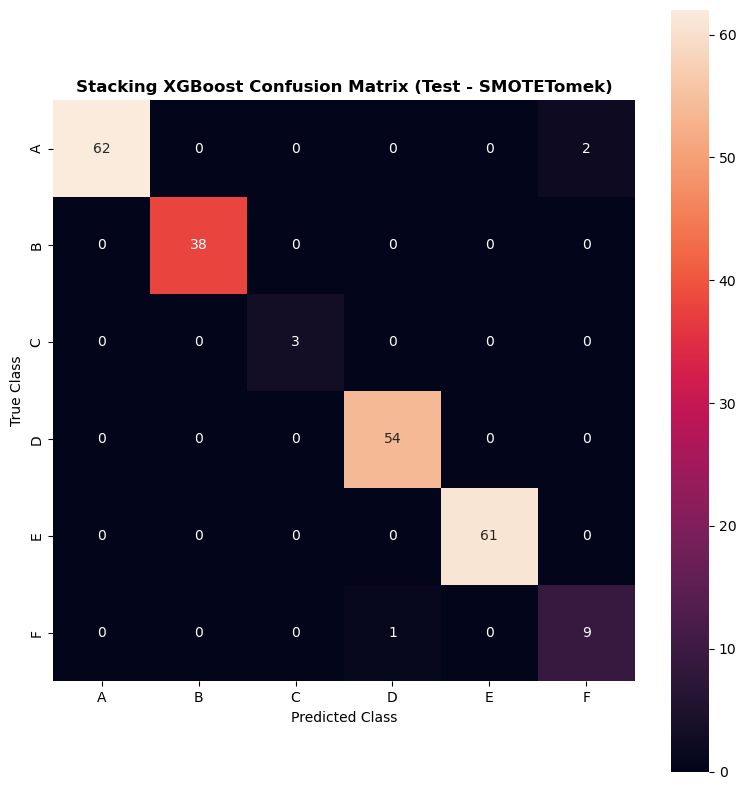


📌 Referencia de clases:
A - Healthy
B - Iron deficiency anemia
C - Macrocytic anemia
D - Normocytic hypochromic anemia
E - Normocytic monochromatic anemia
F - Other microcytic anemia


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mapeo de clases
letras = ['A', 'B', 'C', 'D', 'E', 'F']
nombres = [
    'Healthy',
    'Iron deficiency anemia',
    'Macrocytic anemia',
    'Normocytic hypochromic anemia',
    'Normocytic monochromatic anemia',
    'Other microcytic anemia'
]
mapa_clases = dict(zip(le.classes_, letras))  # clase original → letra

# Predicciones del modelo
y_test_pred = stacking_model.predict(X_test_np)

# Decodificar clases originales
y_true_labels = le.inverse_transform(y_testset)
y_pred_labels = le.inverse_transform(y_test_pred)

# Aplicar letras codificadas
y_true_labels_letras = [mapa_clases[c] for c in y_true_labels]
y_pred_labels_letras = [mapa_clases[c] for c in y_pred_labels]

# Matriz de confusión
conf_matrix = pd.crosstab(
    pd.Series(y_true_labels_letras, name="ACTUAL"),
    pd.Series(y_pred_labels_letras, name="PREDICCIÓN")
)

# Orden de las clases
orden_letras = ['A', 'B', 'C', 'D', 'E', 'F']

# Gráfico
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix.loc[orden_letras, orden_letras], square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Stacking XGBoost Confusion Matrix (Test - SMOTETomek)', fontweight='bold')
plt.tight_layout()
plt.show()

# Referencia de clases
print("\n📌 Referencia de clases:")
for letra, nombre in zip(letras, nombres):
    print(f"{letra} - {nombre}")


## ROC CURVE (TRAIN)

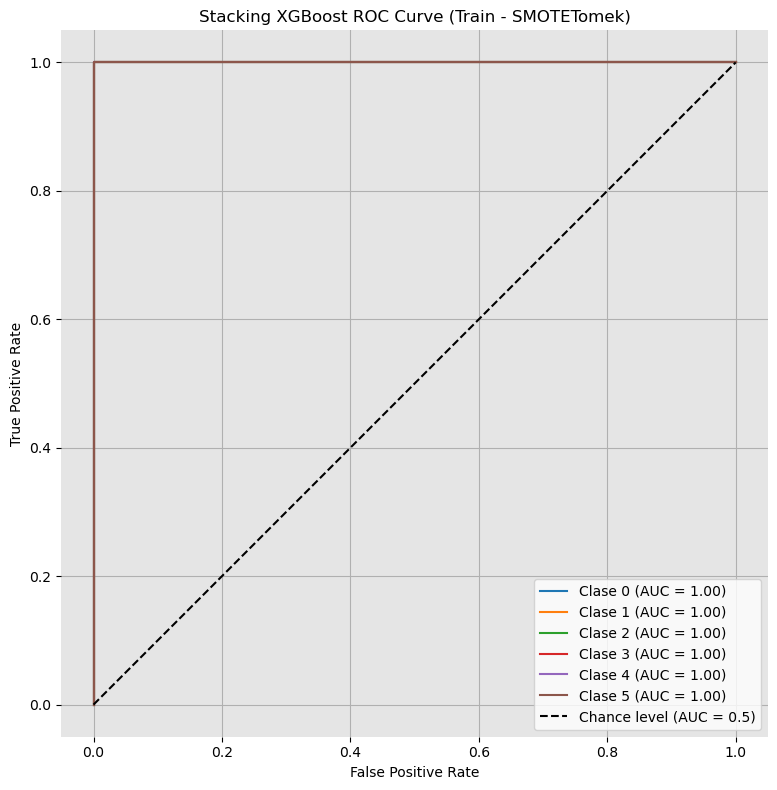

In [70]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, matthews_corrcoef, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# ==== EVALUACIÓN EN ENTRENAMIENTO ====
y_pred_train = stacking_model.predict(X_train_np)
y_probs_train = stacking_model.predict_proba(X_train_np)

# === ROC AUC y CURVAS ROC POR CLASE ===
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train_res)

if y_train_bin.shape[1] == 1:
    # Binario
    roc_auc_train = roc_auc_score(y_train_res, y_probs_train[:, 1])
else:
    # Multiclase
    roc_auc_train = roc_auc_score(y_train_bin, y_probs_train, multi_class='ovr')

    # === CURVAS ROC MULTICLASE ===
    fig, ax = plt.subplots(figsize=(8, 8))  # fondo de la figura
    ax.set_facecolor('#e5e5e5')  # fondo del área de ejes

    # Quitar bordes (spines)
    for spine in ax.spines.values():
        spine.set_visible(False)

    for i in range(y_train_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_probs_train[:, i])
        roc_auc = auc(fpr, tpr)
        class_label = lb.classes_[i]
        ax.plot(fpr, tpr, label=f'Clase {class_label} (AUC = {roc_auc:.2f})')

    ax.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Stacking XGBoost ROC Curve (Train - SMOTETomek)')
    ax.legend(loc='lower right')
    ax.grid(True)
    ax.axis('square')
    plt.tight_layout()
    plt.show()


## ROC CURVE (TEST)

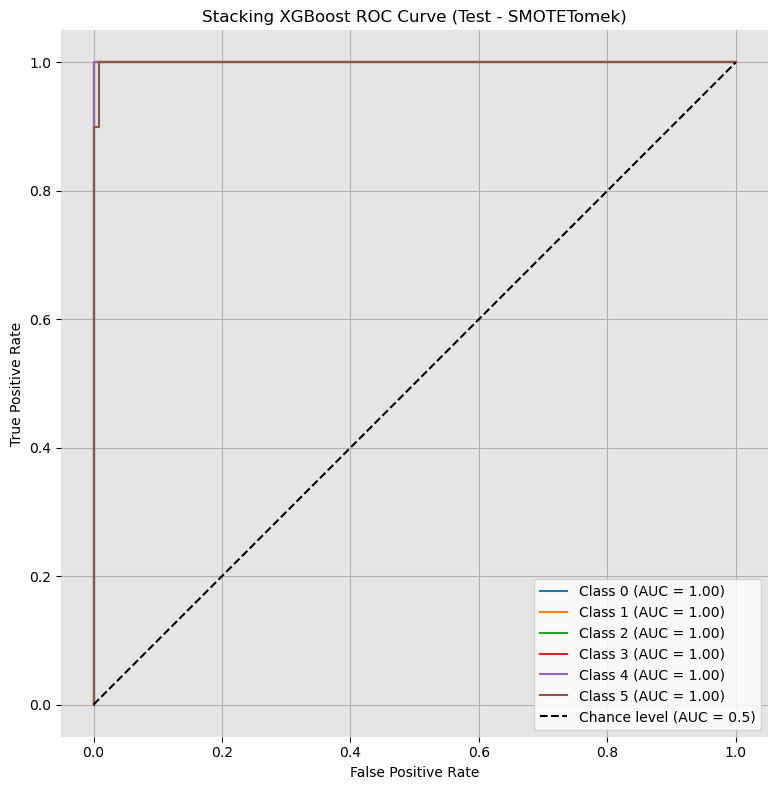

In [73]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, matthews_corrcoef, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np

# ==== TEST SET EVALUATION ====
y_pred_test = stacking_model.predict(X_test_np)
y_probs_test = stacking_model.predict_proba(X_test_np)

# === ROC AUC and CLASS-WISE ROC CURVES ===
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_testset)

if y_test_bin.shape[1] == 1:
    # Binary case
    roc_auc_test = roc_auc_score(y_testset, y_probs_test[:, 1])    
    # Binary ROC curve
    fpr, tpr, _ = roc_curve(y_testset, y_probs_test[:, 1])
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
    
else:
    # Multiclass case
    roc_auc_test = roc_auc_score(y_test_bin, y_probs_test, multi_class='ovr')

    # === CURVAS ROC MULTICLASE ===
    fig, ax = plt.subplots(figsize=(8, 8))  # fondo de la figura
    ax.set_facecolor('#e5e5e5')  # fondo del área de ejes

    # Quitar bordes (spines)
    for spine in ax.spines.values():
        spine.set_visible(False)

    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs_test[:, i])
        roc_auc = auc(fpr, tpr)
        class_label = lb.classes_[i]
        plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

# Common plot elements
    ax.plot([0, 1], [0, 1], 'k--', label='Chance level (AUC = 0.5)')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Stacking XGBoost ROC Curve (Test - SMOTETomek)')
    ax.legend(loc='lower right')
    ax.grid(True)
    ax.axis('square')
    plt.tight_layout()
    plt.show()


## PRECISION RECALL CURVE (TRAIN)

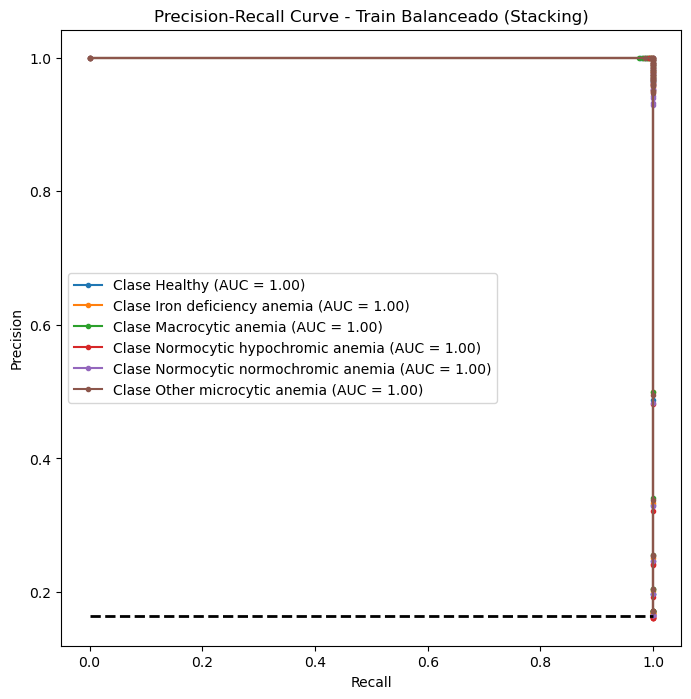

In [77]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Asegurar que los datos estén como arrays
X_train_np = X_train_res.values if hasattr(X_train_res, "values") else X_train_res
y_train_vec = y_train_res.values.ravel() if hasattr(y_train_res, "values") else np.ravel(y_train_res)

# Binarizar etiquetas
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train_vec)

# Obtener probabilidades del modelo
probs = stacking_model.predict_proba(X_train_np)

# Gráfico
plt.figure(figsize=(8, 8))

for i in range(y_train_bin.shape[1]):
    lr_precision, lr_recall, _ = precision_recall_curve(y_train_bin[:, i], probs[:, i])
    pr_auc = auc(lr_recall, lr_precision)
    clase_decodificada = le.inverse_transform([i])[0]
    plt.plot(lr_recall, lr_precision, marker='.', label=f'Clase {clase_decodificada} (AUC = {pr_auc:.2f})')

# Línea de referencia (no skill)
no_skill = np.sum(y_train_bin[:, 0]) / len(y_train_bin)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Train Balanceado (Stacking)')
plt.legend(loc='best')
plt.show()


## PRECISION RECALL CURVE (TEST)

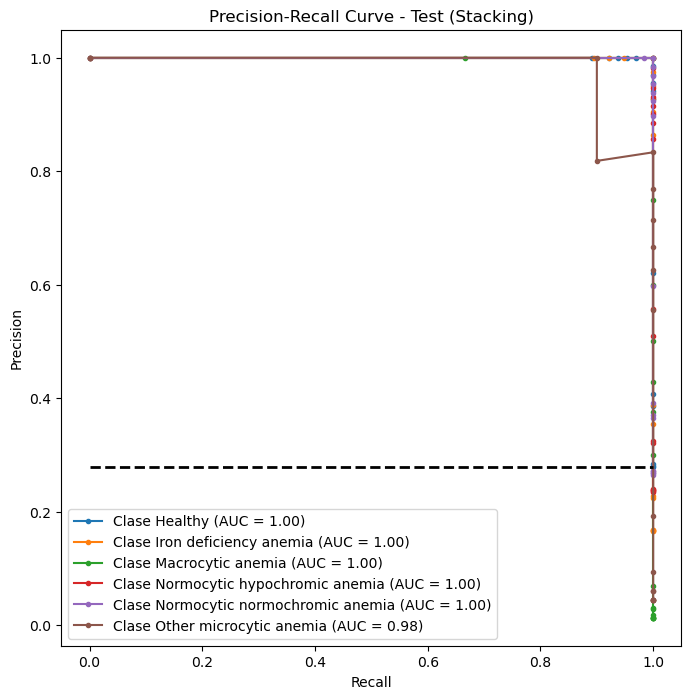

In [80]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Convertir a NumPy
X_test_np = X_testset.values if hasattr(X_testset, "values") else X_testset
y_test_vec = y_testset.values.ravel() if hasattr(y_testset, "values") else np.ravel(y_testset)

# Binarizar etiquetas
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test_vec)

# Obtener probabilidades
probs = stacking_model.predict_proba(X_test_np)

# Crear la figura
plt.figure(figsize=(8, 8))

# Curva Precision-Recall por clase
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], probs[:, i])
    pr_auc = auc(recall, precision)
    clase_decodificada = le.inverse_transform([i])[0]
    plt.plot(recall, precision, marker='.', label=f'Clase {clase_decodificada} (AUC = {pr_auc:.2f})')

# Línea de referencia (no-skill)
no_skill = np.sum(y_test_bin[:, 0]) / len(y_test_bin)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2)

# Estética
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Test (Stacking)')
plt.legend(loc='best')
plt.show()


In [101]:
import joblib

# Guardar el modelo de stacking y el codificador de etiquetas
joblib.dump({
    'modelo': stacking_model,
    'label_encoder': le
}, 'modelo_con_todo.pkl')


['modelo_con_todo.pkl']

In [103]:
import joblib
import os

# Crear la carpeta Models si no existe
os.makedirs("Models", exist_ok=True)

# Guardar el modelo y el codificador
joblib.dump({'modelo': stacking_model, 'label_encoder': le}, 'Models/XGBOOST.pkl')

['Models/XGBOOST.pkl']

In [4]:
pip install shap

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   -- ------------------------------------- 30.7/545.3 kB 1.4 MB/s eta 0:00:01
   ------------------------ --------------- 327.7/545.3 kB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 545.3/545.3 kB 6.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


D:\Archivos de programa\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:26:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\Archivos de programa\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:27:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\Archivos de programa\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:27:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\Archivos de prog

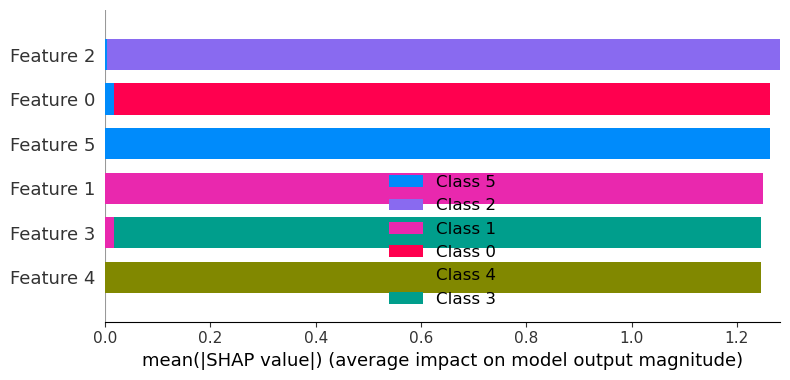

In [53]:
import shap
import matplotlib.pyplot as plt

# 1. Obtener las predicciones de los modelos base (inputs al meta-modelo)
from sklearn.model_selection import cross_val_predict

# Obtener predicciones de los modelos base (modo passthrough=False)
X_meta = cross_val_predict(stacking_model, X_train_res, y_train_res, cv=5, method='predict_proba')

# 2. Entrenar nuevamente el modelo meta por separado con los datos de entrada
meta_model.fit(X_meta, y_train_res)

# 3. Aplicar SHAP al modelo meta
explainer = shap.TreeExplainer(meta_model)
shap_values = explainer.shap_values(X_meta)

# 4. Hacer el gráfico SHAP de resumen (por clase si es multiclase)
shap.summary_plot(shap_values, X_meta, plot_type="bar")

D:\Archivos de programa\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:38:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\Archivos de programa\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:38:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\Archivos de programa\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:38:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\Archivos de prog

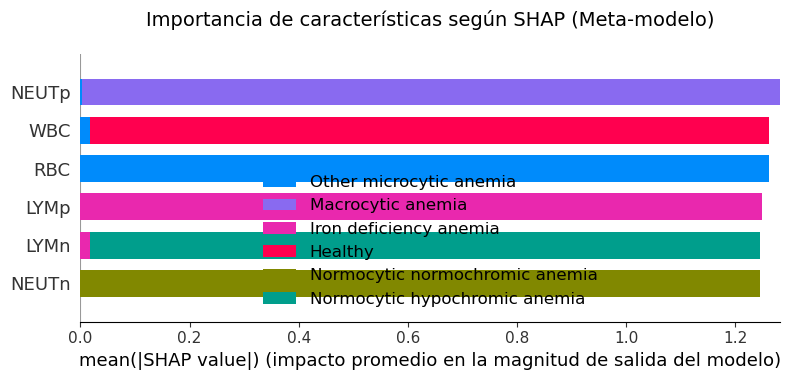

AssertionError: Feature and SHAP matrices must have the same number of rows!

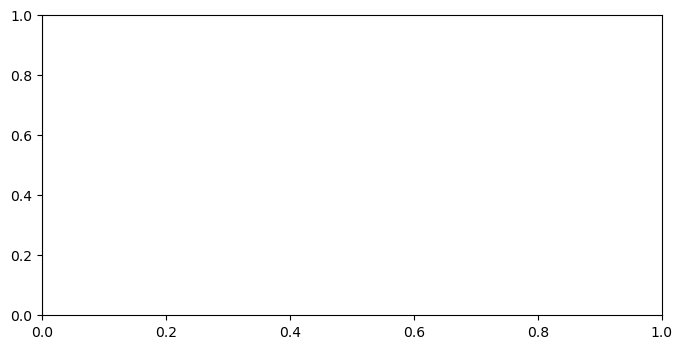

In [55]:
import shap
import matplotlib.pyplot as plt

# Definir nombres de características y clases
feature_names = ['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 
                 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']

class_names = ['Healthy',
               'Iron deficiency anemia',
               'Macrocytic anemia',
               'Normocytic hypochromic anemia',
               'Normocytic normochromic anemia',
               'Other microcytic anemia']

# 1. Obtener las predicciones de los modelos base
X_meta = cross_val_predict(stacking_model, X_train_res, y_train_res, cv=5, method='predict_proba')

# 2. Entrenar el modelo meta
meta_model.fit(X_meta, y_train_res)

# 3. Aplicar SHAP al modelo meta
explainer = shap.TreeExplainer(meta_model)
shap_values = explainer.shap_values(X_meta)

# 4. Crear gráfico SHAP con nombres reales
plt.figure(figsize=(12, 8))

# Gráfico de barras resumen
shap.summary_plot(shap_values, X_meta, 
                 feature_names=feature_names,
                 class_names=class_names,
                 plot_type="bar",
                 show=False)

plt.title("Importancia de características según SHAP (Meta-modelo)", fontsize=14, pad=20)
plt.xlabel("mean(|SHAP value|) (impacto promedio en la magnitud de salida del modelo)")
plt.tight_layout()
plt.show()

# Opcional: Gráfico detallado por clase (puedes elegir una clase específica)
class_idx = 1  # Por ejemplo: Iron deficiency anemia
shap.summary_plot(shap_values[class_idx], X_meta, 
                 feature_names=feature_names,
                 show=False)
plt.title(f"Impacto de características para {class_names[class_idx]}", fontsize=14)
plt.tight_layout()
plt.show()

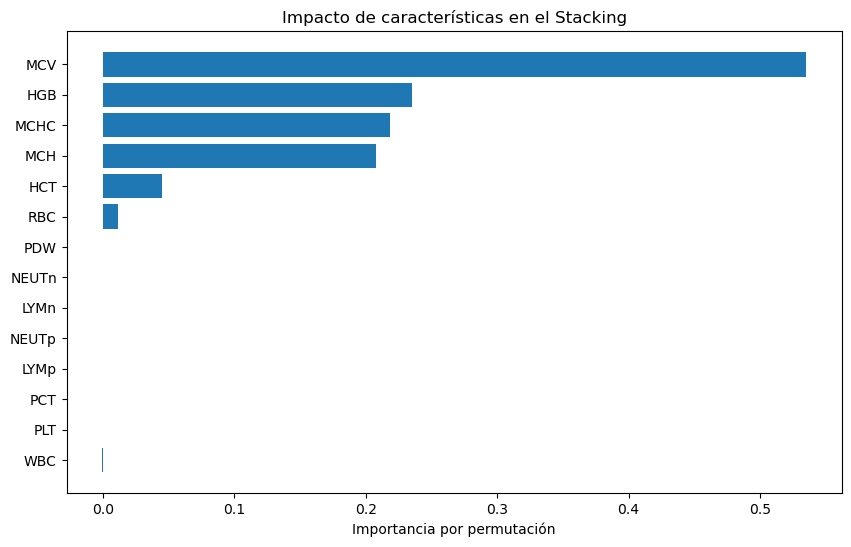

In [65]:
from sklearn.inspection import permutation_importance

result = permutation_importance(stacking_model, X_train_res, y_train_res, n_repeats=10, random_state=0)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Importancia por permutación")
plt.title("Impacto de características en el Stacking")
plt.show()

In [67]:
print(stacking_model.named_estimators_.keys())


dict_keys(['dt', 'rf', 'lr', 'svm', 'lgbm'])


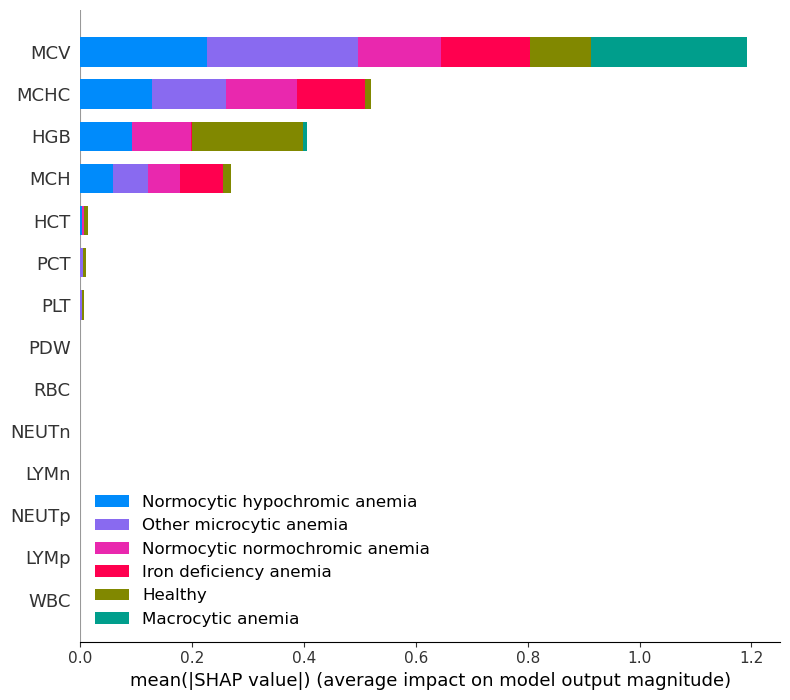

In [83]:
base_model = stacking_model.named_estimators_['dt']  # Nombre correcto
explainer = shap.TreeExplainer(base_model)
shap_values = explainer.shap_values(X_train_res)

# Gráfico SHAP con nombres reales
shap.summary_plot(
    shap_values, 
    X_train_res, 
    feature_names=feature_names, 
    class_names=class_names,
    plot_type="bar"  # También puedes usar "dot" para más detalle
)

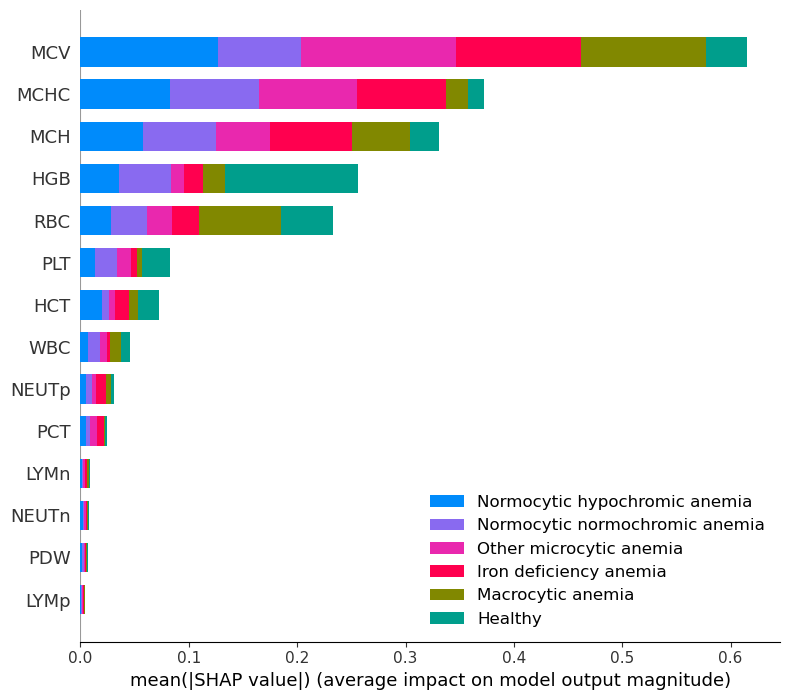

In [73]:
base_model = stacking_model.named_estimators_['rf']  # Nombre correcto
explainer = shap.TreeExplainer(base_model)
shap_values = explainer.shap_values(X_train_res)

# Gráfico SHAP con nombres reales
shap.summary_plot(
    shap_values, 
    X_train_res, 
    feature_names=feature_names, 
    class_names=class_names,
    plot_type="bar"  # También puedes usar "dot" para más detalle
)

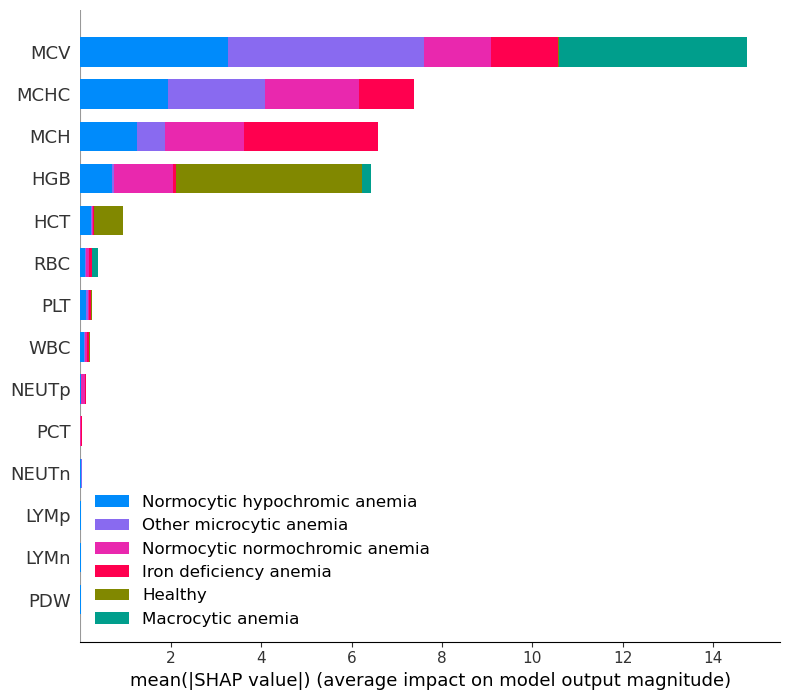

In [79]:
base_model = stacking_model.named_estimators_['lgbm']  # Nombre correcto
explainer = shap.TreeExplainer(base_model)
shap_values = explainer.shap_values(X_train_res)

# Gráfico SHAP con nombres reales
shap.summary_plot(
    shap_values, 
    X_train_res, 
    feature_names=feature_names, 
    class_names=class_names,
    plot_type="bar"  # También puedes usar "dot" para más detalle
)

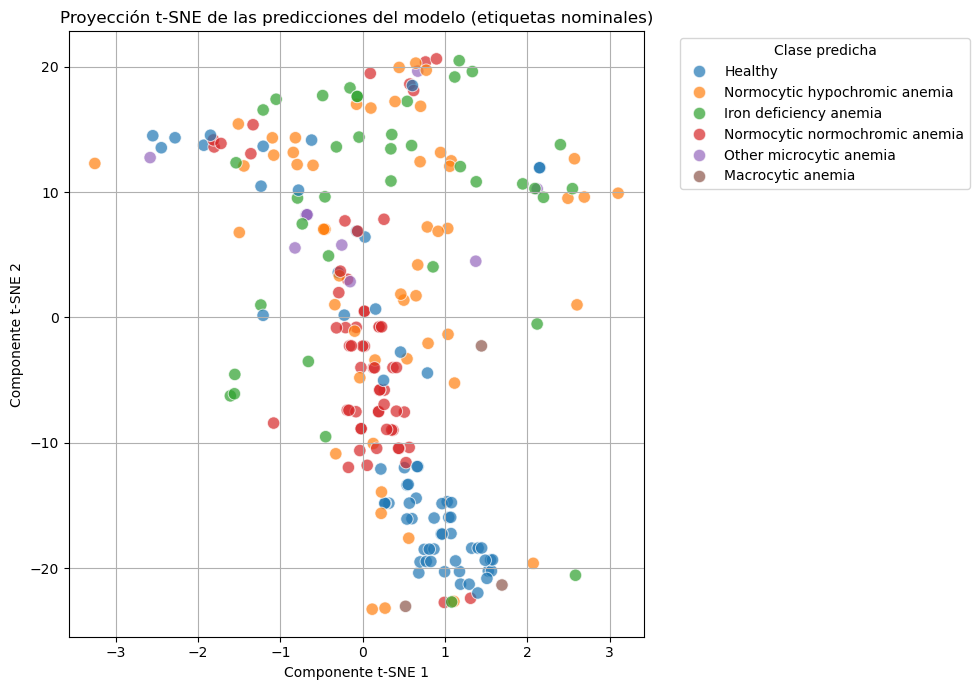

In [155]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nombres de las clases según codificación
etiquetas_clases = [
    "Healthy",
    "Iron deficiency anemia",
    "Macrocytic anemia",
    "Normocytic hypochromic anemia",
    "Normocytic normochromic anemia",
    "Other microcytic anemia"
]

# Aplicar t-SNE a los datos de prueba
tsne = TSNE(n_components=2, random_state=0)
X_embedded = tsne.fit_transform(X_testset)

# Crear DataFrame con resultados
df_tsne = pd.DataFrame(X_embedded, columns=['TSNE1', 'TSNE2'])
df_tsne['Clase_predicha'] = y_pred

# Mapear clase predicha de número a nombre
df_tsne['Clase_predicha'] = df_tsne['Clase_predicha'].map(dict(enumerate(etiquetas_clases)))

# Gráfico
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_tsne,
    x='TSNE1',
    y='TSNE2',
    hue='Clase_predicha',
    palette='tab10',
    s=80,
    alpha=0.7
)

plt.title("Proyección t-SNE de las predicciones del modelo (etiquetas nominales)")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.grid(True)
plt.legend(title='Predicted Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


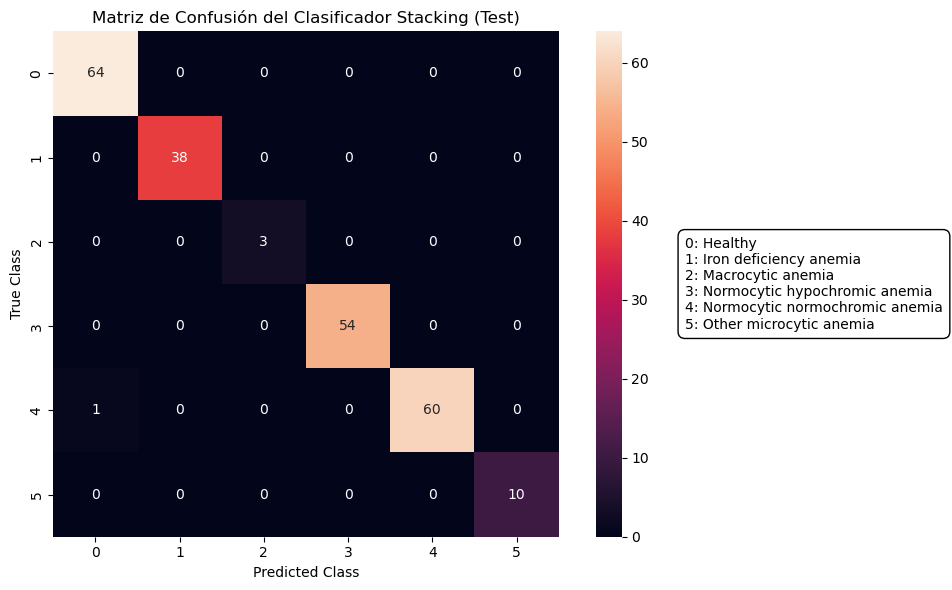

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Predicciones del modelo (codificadas)
y_test_pred = stacking_model.predict(X_testset)

# Usar valores codificados directamente
y_true_encoded = y_testset
y_pred_encoded = y_test_pred

# Crear matriz de confusión con números (0, 1, 2, ...)
conf_matrix = pd.crosstab(y_true_encoded, y_pred_encoded, rownames=['ACTUAL'], colnames=['PREDICCIÓN'])

# Mapa de etiquetas: número -> nombre
class_mapping = {i: label for i, label in enumerate(le.classes_)}
legend_labels = '\n'.join([f"{i}: {label}" for i, label in class_mapping.items()])

# Crear gráfico
plt.figure(figsize=(10, 6))
ax = sns.heatmap(conf_matrix, square=True, annot=True, fmt='d', cbar=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Matriz de Confusión del Clasificador Stacking (Test)')

# Agregar leyenda en recuadro al lado
plt.text(
    x=conf_matrix.shape[1] + 1.5,  # posición horizontal fuera de la matriz
    y=conf_matrix.shape[0] / 2,    # posición vertical centrada
    s=legend_labels,
    fontsize=10,
    va='center',
    bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black')
)

plt.tight_layout()
plt.show()


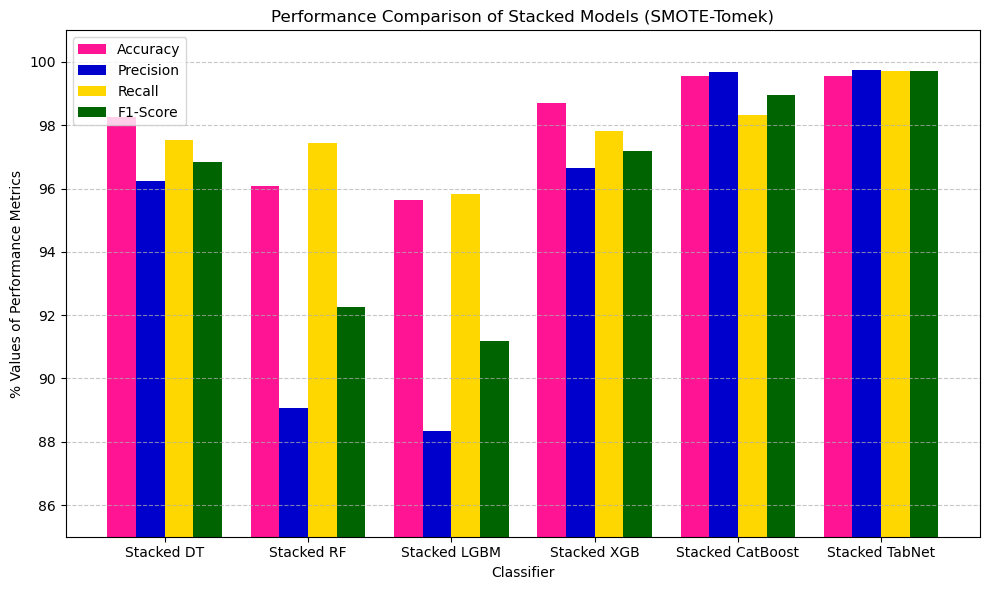

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Nombres de los modelos
modelos = [
    "Stacked DT", "Stacked RF", "Stacked LGBM",
    "Stacked XGB", "Stacked CatBoost", "Stacked TabNet"
]

# Métricas (convertidas a porcentaje sin el símbolo %)
accuracy = [98.26, 96.08, 95.65, 98.69, 99.56, 99.56]
precision = [96.23, 89.06, 88.35, 96.66, 99.69, 99.74]
recall = [97.55, 97.45, 95.83, 97.81, 98.33, 99.72]
f1_score = [96.84, 92.25, 91.18, 97.20, 98.96, 99.73]

# Posiciones y configuración del gráfico
x = np.arange(len(modelos))
width = 0.2

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy', color='deeppink')
plt.bar(x - 0.5*width, precision, width, label='Precision', color='mediumblue')
plt.bar(x + 0.5*width, recall, width, label='Recall', color='gold')
plt.bar(x + 1.5*width, f1_score, width, label='F1-Score', color='darkgreen')

# Etiquetas y leyenda
plt.xlabel("Classifier")
plt.ylabel("% Values of Performance Metrics")
plt.title("Performance Comparison of Stacked Models (SMOTE-Tomek)")
plt.xticks(x, modelos)
plt.ylim(85, 101)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


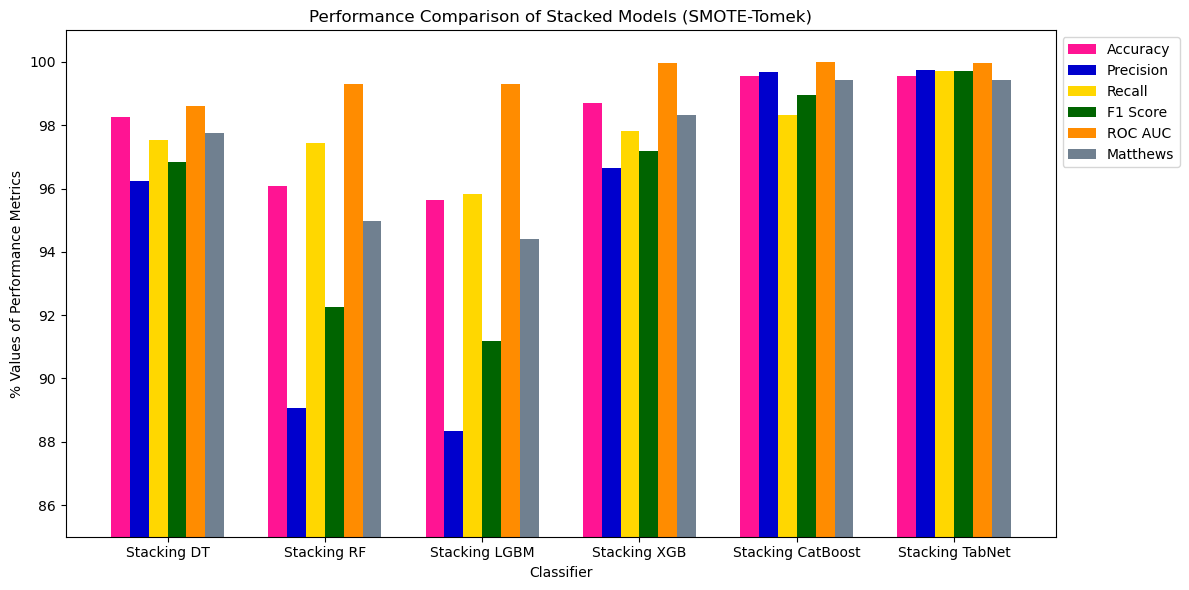

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Nombres de los modelos
modelos = [
    "Stacking DT", "Stacking RF", "Stacking LGBM",
    "Stacking XGB", "Stacking CatBoost", "Stacking TabNet"
]

# Métricas (% sin símbolo)
accuracy =  [98.26, 96.08, 95.65, 98.69, 99.56, 99.56]
precision = [96.23, 89.06, 88.35, 96.66, 99.69, 99.74]
recall =    [97.55, 97.45, 95.83, 97.81, 98.33, 99.72]
f1_score =  [96.84, 92.25, 91.18, 97.20, 98.96, 99.73]
roc_auc =   [98.60, 99.29, 99.31, 99.98, 100.00, 99.98]
matthews =  [97.75, 94.97, 94.41, 98.31, 99.43, 99.43]

# Configuración del gráfico
x = np.arange(len(modelos))
width = 0.12  # Ancho de cada barra

plt.figure(figsize=(12, 6))

# Crear barras agrupadas
plt.bar(x - 2.5*width, accuracy, width, label='Accuracy', color='deeppink')
plt.bar(x - 1.5*width, precision, width, label='Precision', color='mediumblue')
plt.bar(x - 0.5*width, recall, width, label='Recall', color='gold')
plt.bar(x + 0.5*width, f1_score, width, label='F1 Score', color='darkgreen')
plt.bar(x + 1.5*width, roc_auc, width, label='ROC AUC', color='darkorange')
plt.bar(x + 2.5*width, matthews, width, label='Matthews', color='slategray')

# Etiquetas, título y leyenda
plt.xlabel("Classifier")
plt.ylabel("% Values of Performance Metrics")
plt.title("Performance Comparison of Stacked Models (SMOTE-Tomek)")
plt.xticks(x, modelos)
plt.ylim(85, 101)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


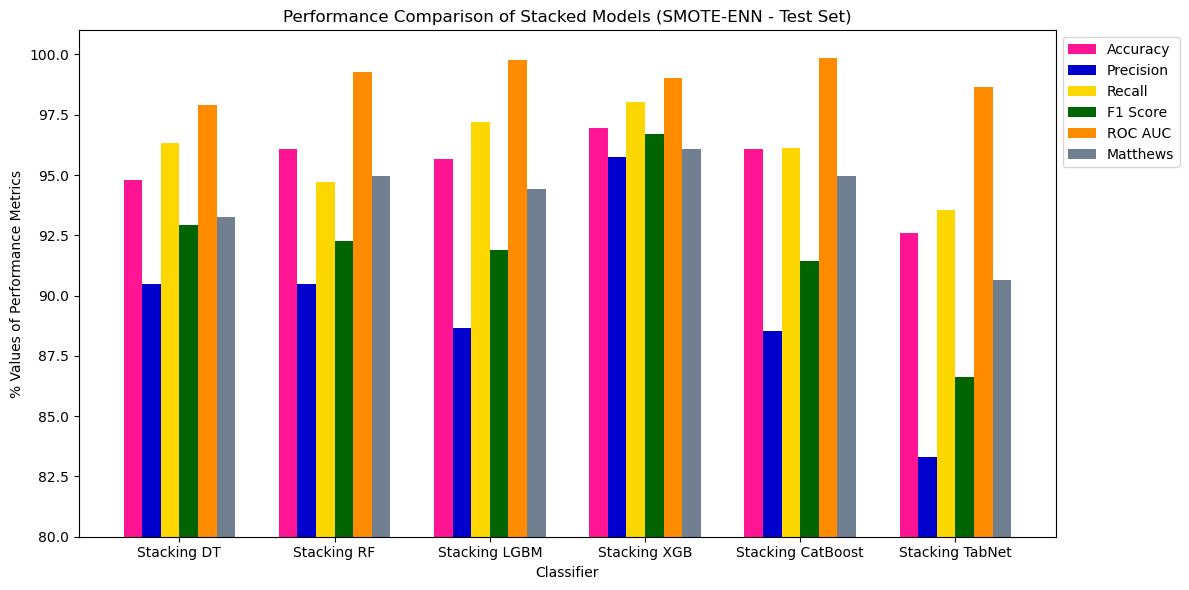

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Nombres de los modelos
modelos = [
    "Stacking DT", "Stacking RF", "Stacking LGBM",
    "Stacking XGB", "Stacking CatBoost", "Stacking TabNet"
]

# Métricas (% sin símbolo)
accuracy  = [94.78, 96.08, 95.65, 96.95, 96.08, 92.60]
precision = [90.46, 90.46, 88.65, 95.73, 88.53, 83.31]
recall    = [96.31, 94.73, 97.19, 98.01, 96.14, 93.54]
f1_score  = [92.93, 92.26, 91.90, 96.72, 91.42, 86.64]
roc_auc   = [97.92, 99.28, 99.78, 99.03, 99.87, 98.67]
matthews  = [93.26, 94.94, 94.42, 96.07, 94.97, 90.65]

# Configuración del gráfico
x = np.arange(len(modelos))
width = 0.12  # Ancho de cada barra

plt.figure(figsize=(12, 6))

# Crear barras agrupadas
plt.bar(x - 2.5*width, accuracy, width, label='Accuracy', color='deeppink')
plt.bar(x - 1.5*width, precision, width, label='Precision', color='mediumblue')
plt.bar(x - 0.5*width, recall, width, label='Recall', color='gold')
plt.bar(x + 0.5*width, f1_score, width, label='F1 Score', color='darkgreen')
plt.bar(x + 1.5*width, roc_auc, width, label='ROC AUC', color='darkorange')
plt.bar(x + 2.5*width, matthews, width, label='Matthews', color='slategray')

# Etiquetas, título y leyenda
plt.xlabel("Classifier")
plt.ylabel("% Values of Performance Metrics")
plt.title("Performance Comparison of Stacked Models (SMOTE-ENN - Test Set)")
plt.xticks(x, modelos)
plt.ylim(80, 101)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
